In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

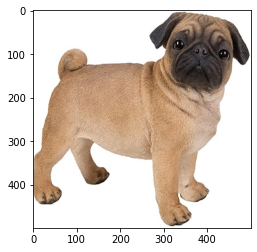

In [15]:
import imageio
import cv2
import matplotlib.pyplot as plt

cano_img = cv2.resize(imageio.imread("pug.jpg"), (500, 500))
height, width, _3 = cano_img.shape
plt.imshow(cano_img)
plt.show()

In [19]:
angle = torch.rand() * 90 - 45
scale = torch.randn([1]).abs()
transl = torch.randn([2])
print (angle, scale, transl)

TypeError: rand() received an invalid combination of arguments - got (), but expected one of:
 * (tuple of ints size, *, torch.Generator generator, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, torch.Generator generator, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


In [16]:
import random
import math
import numpy as np 


def aug_matrix(w1, h1, w2, h2, 
               angle_range=(-45, 45), 
               scale_range=(0.5, 1.5), 
               trans_range=(-0.3, 0.3)):
    ''' 
    first Translation, then rotate, final scale.
        [sx, 0, 0]       [cos(theta), -sin(theta), 0]       [1, 0, dx]       [x]
        [0, sy, 0] (dot) [sin(theta),  cos(theta), 0] (dot) [0, 1, dy] (dot) [y]
        [0,  0, 1]       [         0,           0, 1]       [0, 0,  1]       [1]
    '''
    dx = (w2-w1)/2.0
    dy = (h2-h1)/2.0
    matrix_trans = np.array([[1.0, 0, dx],
                             [0, 1.0, dy],
                             [0, 0,   1.0]])

    angle = random.random()*(angle_range[1]-angle_range[0])+angle_range[0]
    scale = random.random()*(scale_range[1]-scale_range[0])+scale_range[0]
    scale *= np.min([float(w2)/w1, float(h2)/h1])
    alpha = scale * math.cos(angle/180.0*math.pi)
    beta = scale * math.sin(angle/180.0*math.pi)

    trans = random.random()*(trans_range[1]-trans_range[0])+trans_range[0]
    centerx = w2/2.0 + w2*trans
    centery = h2/2.0 + h2*trans
    H = np.array([[alpha, beta, (1-alpha)*centerx-beta*centery], 
                  [-beta, alpha, beta*centerx+(1-alpha)*centery],
                  [0,         0,                            1.0]])

    H = H.dot(matrix_trans)[0:2, :]
    return H 

view_mat = aug_matrix(
    width, height, width, height,
    angle_range=(-90, 90), 
    scale_range=(0.3, 2), 
    trans_range=(-0.5, 0.5)
)
print (view_mat)

[[   1.23921539    0.94042867 -424.00901325]
 [  -0.94042867    1.23921539  252.04276583]]


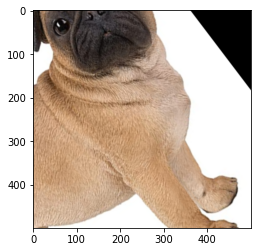

In [17]:
view_img = cv2.warpAffine(cano_img, view_mat, (width, height), borderValue=(0, 0, 0))
plt.imshow(view_img)
plt.show()


In [ ]:
x_cano = torch.stack(
    torch.meshgrid(
        torch.arange(width) + 0.5,
        torch.linspace(0, 1, texture_img.shape[0]),
        indexing="ij"
    ),
    dim=-1
)